### Visualization of Bifurcations along Trainings Trajectory

##### To run this Notebook the bptt code at https://github.com/DurstewitzLab/GTF-shPLRNN must be installed

In [2]:
using Plots#
using JLD2
using LaTeXStrings
using BPTT
using NPZ
using MultivariateStats
using BSON



### Real world example rebuttal


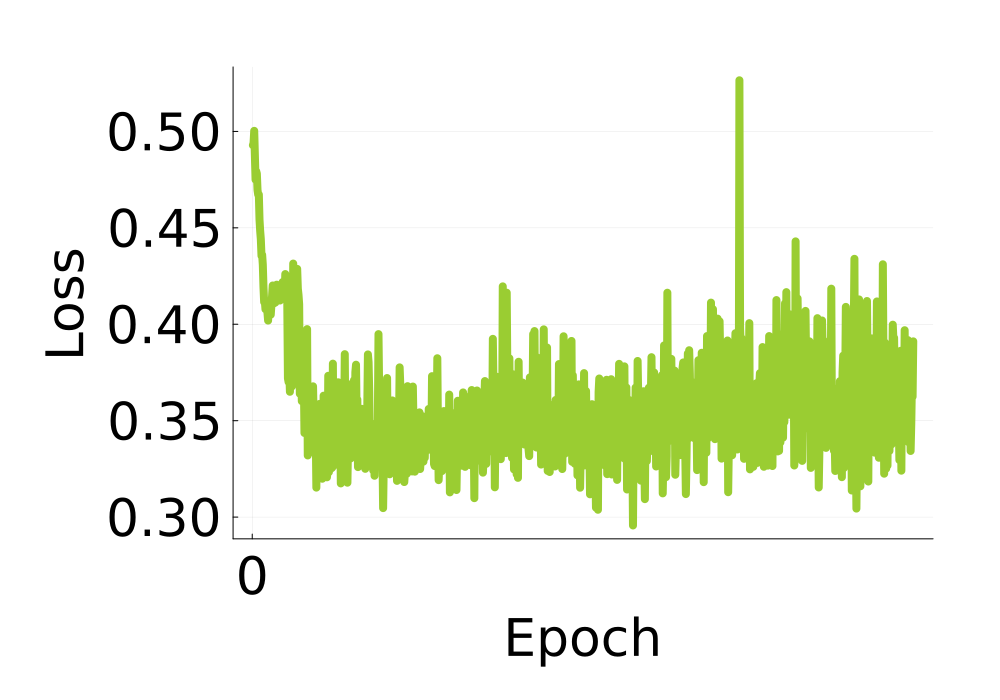

In [4]:
loss = load("example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/Loss_no_TF.jld2")["loss"]

loss_plot = Plots.plot(size=(1000,700),xtickfont=font(35), legend = false, 
ytickfont=font(35),xguidefontsize=35,yguidefontsize=35,legendfont=font(22),linewidth=3,margin=15Plots.mm)

Plots.plot!(loss_plot,collect(1:1:1000),loss[1:1000],xticks=[0,6000,2000],linewidth=8,color="yellowgreen")
#scatter!([2500],[loss[2500]],color="red",linewidth=8,m=12)
#scatter!([2200],[loss[2200]],color="red",linewidth=8,m=12)
#scatter!([2180],[loss[2180]],color="red",linewidth=8,m=12)
xlabel!("Epoch")
ylabel!("Loss")
#savefig(loss_plot,"loss_plot_TF.png")
#display(loss_plot)

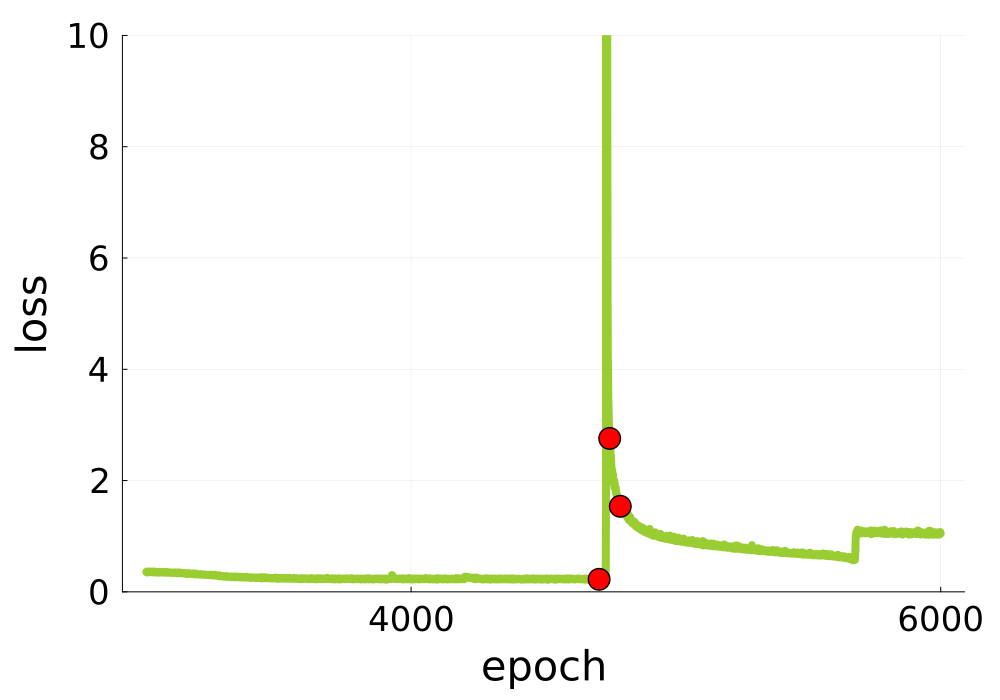

In [5]:
loss = load("example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/Loss.jld2")["loss"]
loss_plot = Plots.plot(size=(1000,700),xtickfont=font(23), legend = false, ylims=(0,10),
ytickfont=font(23),xguidefontsize=28,yguidefontsize=28,legendfont=font(22),linewidth=3,margin=7Plots.mm)

Plots.plot!(loss_plot,collect(3000:1:6000),loss[3000:6000],xticks=[4000,6000],linewidth=8,color="yellowgreen")
#scatter!([2500],[loss[2500]],color="red",linewidth=8,m=12)
#scatter!([2210],[loss[2210]],color="red",linewidth=8,m=12)
#scatter!([2180],[loss[2180]],color="red",linewidth=8,m=12)
scatter!([4710],[loss[4710]],color="red",linewidth=8,m=12)
scatter!([4790],[loss[4790]],color="red",linewidth=8,m=12)
scatter!([4750],[loss[4750]],color="red",linewidth=8,m=12)
#scatter!([4800],[loss[4800]],color="red",linewidth=8,m=12)
xlabel!("epoch")
ylabel!("loss")
savefig(loss_plot,"loss_plot_TF.svg")
display(loss_plot)

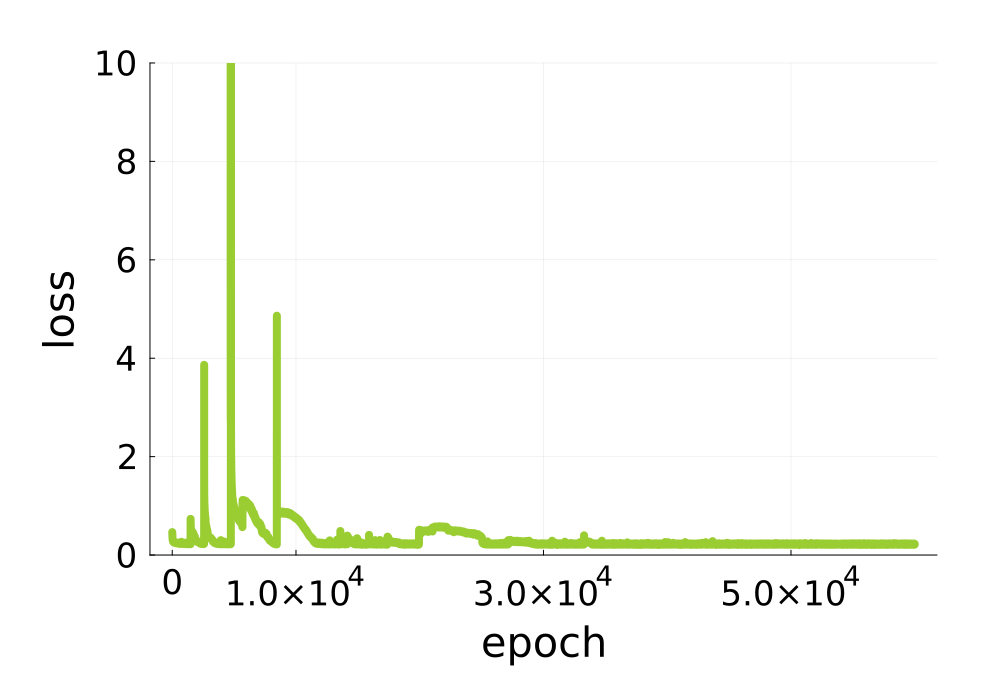

In [6]:
loss = load("example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/Loss.jld2")["loss"]
loss_plot = Plots.plot(size=(1000,700),xtickfont=font(23), legend = false,
ytickfont=font(23),xguidefontsize=28,yguidefontsize=28,legendfont=font(22),linewidth=3,margin=14Plots.mm,ylims=(0,10))

Plots.plot!(loss_plot,collect(1:1:60000),loss[1:60000],xticks=[0,10000,30000,50000],linewidth=8,color="yellowgreen")
#scatter!([2500],[loss[2500]],color="red",linewidth=8,m=12)
#scatter!([2210],[loss[2210]],color="red",linewidth=8,m=12)
#scatter!([2180],[loss[2180]],color="red",linewidth=8,m=12)
#scatter!([4710],[loss[4710]],color="red",linewidth=8,m=12)
#scatter!([4790],[loss[4790]],color="red",linewidth=8,m=12)
#scatter!([4800],[loss[4800]],color="red",linewidth=8,m=12)
xlabel!("epoch")
ylabel!("loss")
savefig(loss_plot,"loss_plot_TF_all_v2.svg")
display(loss_plot)

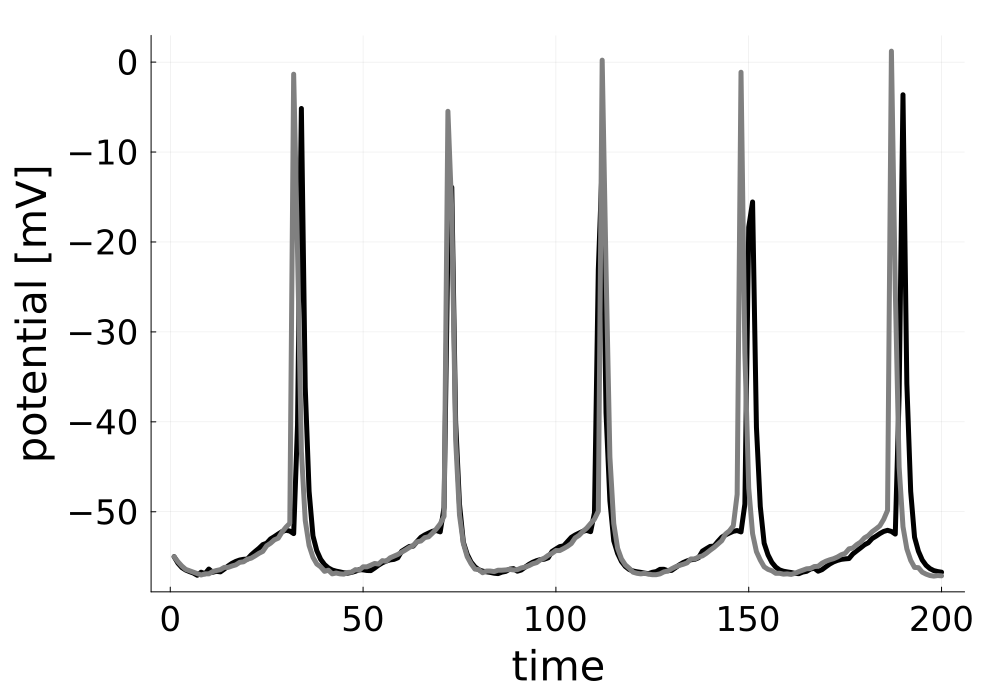

37

In [8]:

data=npzread("ExampleCell/lukas_data.npy")
model_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints"
m, O = load_model(model_path*"/model_"*"60000"*".bson")
traj=generate(m,O,data[10,1:end],10000000)
#smaller markers
#get unique two dimensional vectors in traj
#unique_vectors=
unique_points = unique(round.(traj[9999500:end,1],digits=3),dims=1)
println(length(unique_points))

data=npzread("ExampleCell/lukas_data.npy")
mean = -0.05224843587548712
std = 0.00968304068272246

#smaller markersA
kl=plot([1:200],(traj[1:200,1].*std.+mean).*1000,markersize=0.3,label="generated",size=(1000,700),xtickfont=font(23), 
ytickfont=font(23),xguidefontsize=28,yguidefontsize=28,legendfont=font(22),linewidth=5,margin=7Plots.mm,color="black",legend=false)
plot!([1:200],(data[10:209,1].*std.+mean).*1000,label="data",color="gray",linewidth=5)
xlabel!("time")
ylabel!("potential [mV]")
savefig("traj_before_bif.svg")
display(kl)

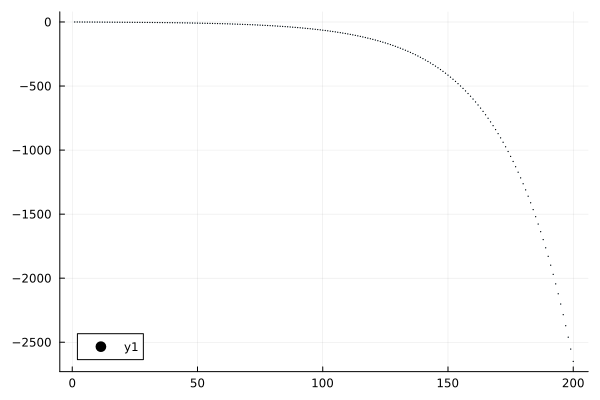

1


[NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN]
NaN
NaN

In [9]:
model_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints"
m, O = load_model(model_path*"/model_"*"4750"*".bson")
traj=generate(m,O,data[1,1:end],10000000)
#smaller markers
kl=scatter([1:200],traj[1:200,1],markersize=0.3)
display(kl)

unique_points = unique(round.(traj[9999500:end,1],digits=3),dims=1)
println(length(unique_points))

println(round.(traj[9999030:9999040],digits=3))
println(traj[9999000])
println(traj[9999037])


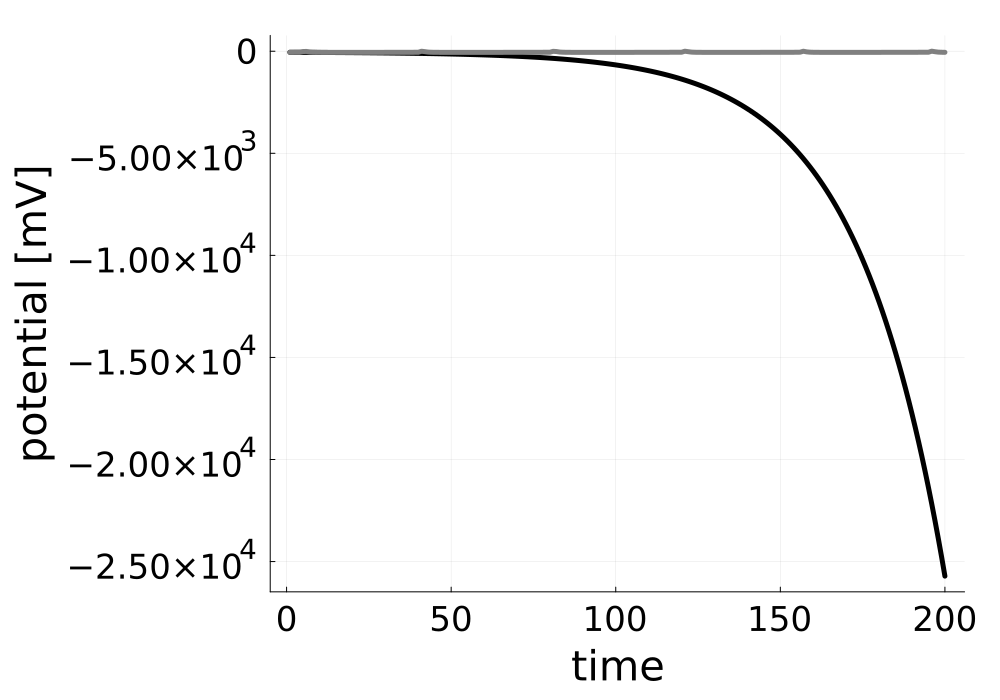

In [10]:
data=npzread("ExampleCell/lukas_data.npy")
mean = -0.05224843587548712
std = 0.00968304068272246
#smaller markersA
kl=plot([1:200],(traj[1:200,1].*std.+mean).*1000,markersize=0.3,label="generated",size=(1000,700),xtickfont=font(23), 
ytickfont=font(23),xguidefontsize=28,yguidefontsize=28,legendfont=font(22),linewidth=5,margin=7Plots.mm,color="black",legend=false)
plot!([1:200],(data[1:200,1].*std.+mean).*1000,label="data",color="gray",linewidth=5)
xlabel!("time")
ylabel!("potential [mV]")
savefig("traj_at_bif.svg")
display(kl)

### Visualize the fully trained system

[0.022428681706574832, -0.46164486153706874, -0.3422399359675656, 5.2568738072960794, -0.48423484672230394, -0.2776968998619862]

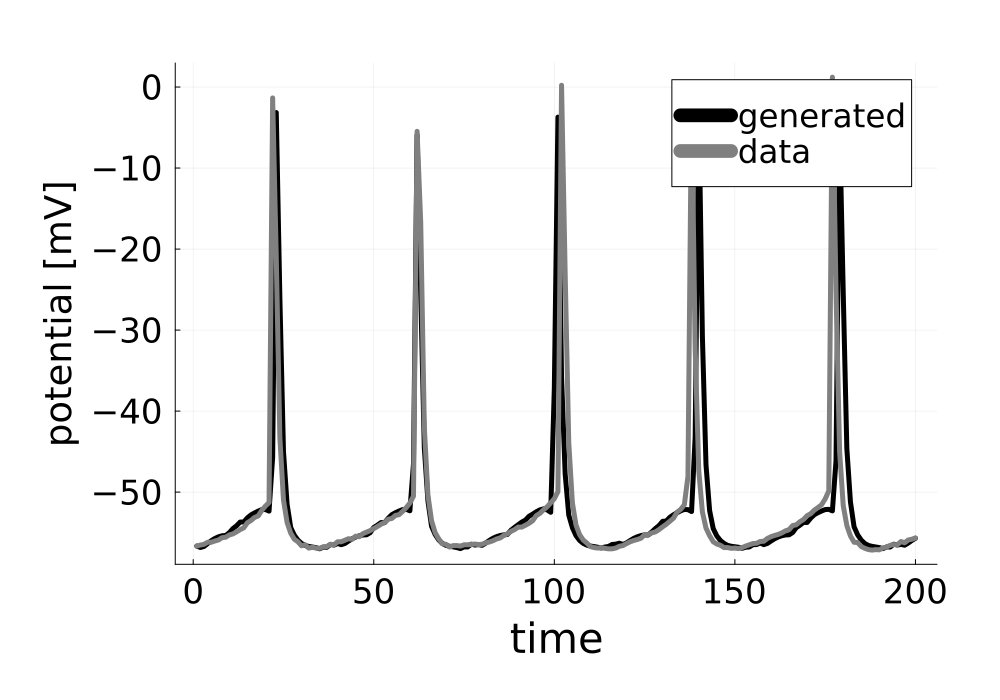


37
[-0.077, -0.05, -0.02, 0.006, 0.019, 0.007, -0.022, 1.441, 4.96, 1.687, 0.466]
1.6871362502460272
1.4409976904556567


In [13]:

data=npzread("ExampleCell/lukas_data.npy")
model_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints"
m, O = load_model(model_path*"/model_"*"60000"*".bson")
println(data[2,1:end])

traj=generate(m,O,data[20,1:end],10000000)
#smaller markers
kl=scatter([100:300],traj[100:300,1],markersize=0.3)
#display(kl)
#get unique two dimensional vectors in traj
#unique_vectors=
unique_points = unique(round.(traj[9999500:end,1],digits=3),dims=1)
println(length(unique_points))

println(round.(traj[9999030:9999040],digits=3))
println(traj[9999000])
println(traj[9999037])
#println(unique_points[1])
#101
#kl=scatter(traj[9999500:end,1],traj[9999500:end,2],markersize=0.3)
#display(kl)

data=npzread("ExampleCell/lukas_data.npy")

#smaller markersA
kl=plot([1:200],(traj[1:200,1].*std.+mean).*1000,markersize=0.3,label="generated",size=(1000,700),xtickfont=font(23), 
ytickfont=font(23),xguidefontsize=28,yguidefontsize=25,legendfont=font(22),linewidth=5,margin=14Plots.mm,color="black")
plot!([1:200],(data[20:219,1].*std.+mean).*1000,label="data",color="gray",linewidth=5)
xlabel!("time")
ylabel!("potential [mV]")
savefig("traj_60000.svg")
display(kl)

### visualize state space 

1
40

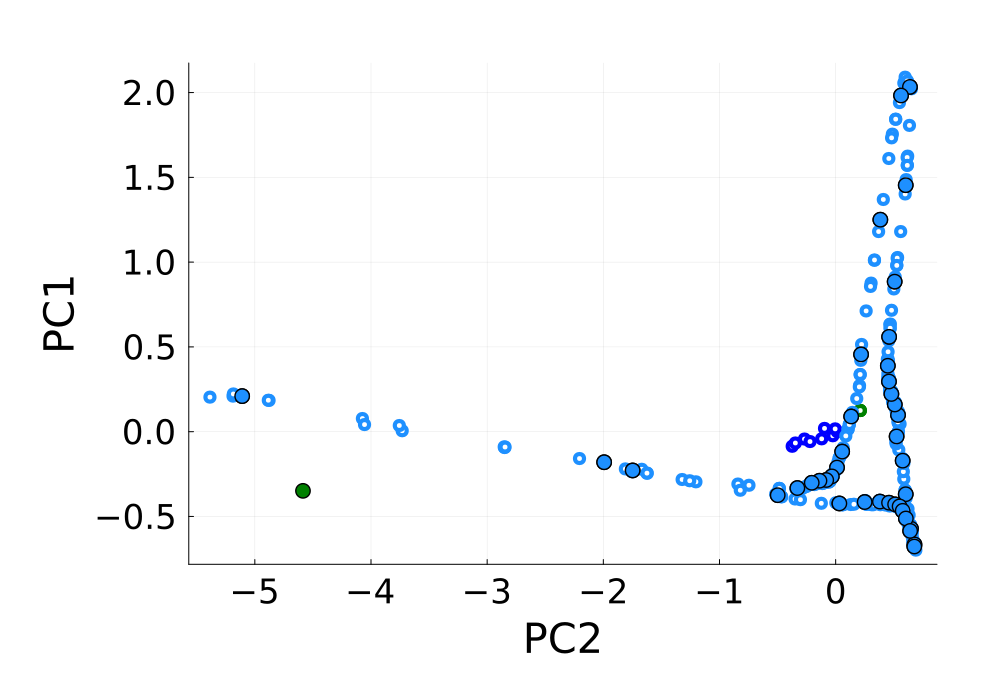


Float32[-0.32409152, -0.40608978, -0.07848362, -0.38477576, -0.37349108, -0.10389523]

"c:\\Users\\lukas.eisenmann\\Documents\\PhD\\Code\\SCYFI\\data\\Figure4\\state_space_v2_legend.svg"

In [11]:
state_space = Plots.plot(size=(1000,700),xtickfont=font(23), legend = false, 
ytickfont=font(23),xguidefontsize=28,yguidefontsize=28,legendfont=font(22),linewidth=3,margin=14Plots.mm)

# PCA into one dimensions
experiment_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/dynamical_objects_60000_order_1_40.jld2"

data_coarse=load(experiment_path)
println(length(data_coarse["dynamical_objects"]))
# Add all points to a single vector so we can perform the PCA
points = Vector[]
for i in eachindex(data_coarse["dynamical_objects"])
    println(length(data_coarse["dynamical_objects"][i][1]))
    try
        for j in eachindex(data_coarse["dynamical_objects"][i][1])
           for k = 1:length(data_coarse["dynamical_objects"][i][1][j])
                for n =1:j
                    push!(points,data_coarse["dynamical_objects"][i][1][j][k][n])
                end
            end
         end
    catch
        continue
    end
end

M = fit(PCA, transpose(mapreduce(permutedims, vcat, points)); maxoutdim=2)



for i in eachindex(data_coarse["dynamical_objects"])
    for j in eachindex(data_coarse["dynamical_objects"][i][1])
        if j>0
            try
                for k = 1:length(data_coarse["dynamical_objects"][i][1][j])
                    if all(abs.(data_coarse["dynamical_objects"][i][2][j][k]) .< 1)
                    #println(float(x_coarse[i]), predict(M,data_coarse["dynamical_objects"][i][1][j][1][k])[1])
                        for n =1:j
                            if j==39
                                if n==1
                                    scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m=8,color="dodgerblue",markershape=:circle,label=string(j))
                                else
                                    scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m=8,color="dodgerblue",markershape=:circle,label=nothing)
    
                                end
                            end
                            if j<39
                                scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m=8,color="green",markershape=:circle,label=string(j))
                            end
                        end
                        println(data_coarse["dynamical_objects"][i][1][j][1][k])
                    else
                        for n =1:j
                            if j==39
                                if n ==1
                                    scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m = (5, :white, stroke(3, "dodgerblue")),label=string(j))
                                else
                                    scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m = (5, :white, stroke(3, "dodgerblue")),label=nothing)
                                end
                            end
                            if j == 9
                                if n ==1
                                    scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m = (5, :white, stroke(3, "blue")),label=string(j))
                                else
                                    scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m = (5, :white, stroke(3, "blue")),label=nothing)
                                end
                            end
                            if j==1
                                if n ==1
                                    scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m = (5, :white, stroke(3, "green")),label=string(j))
                                else
                                    scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m = (5, :white, stroke(3, "green")),label=nothing)
                                end
                            end
                                #println(data_coarse["dynamical_objects"][i][1][j][1][k])
                        end
                    end
                end

            catch
                continue
            end
        end
        
    end
end
# stable cycle in forground
i=1
j=39

for k = 3:3
    for n =1:j
        if j==39
            if n==1
                scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m=8,color="dodgerblue",markershape=:circle,label=string(j))
            else
                scatter!([predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[1]], [predict(M,data_coarse["dynamical_objects"][i][1][j][k][n])[2]],m=8,color="dodgerblue",markershape=:circle,label=nothing)

            end
        end
    end
end

ylabel!("PC1")
xlabel!("PC2")
#title!("Eigenvalue components for stable FP involved in Bifurcation")
display(state_space)
savefig("state_space_v2_legend.svg")

### Bifurcation diagram

In [12]:
#40-760
experiment_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/dynamical_objects_4710_4910_order_1 copy.jld2"

data_coarse=load(experiment_path)
println(length(data_coarse["dynamical_objects"]))
# Add all points to a single vector so we can perform the PCA
points = Vector[]
for i in eachindex(data_coarse["dynamical_objects"])
    println(length(data_coarse["dynamical_objects"][i][1]))
    try
        for j in eachindex(data_coarse["dynamical_objects"][i][1])
            for k = 1:length(data_coarse["dynamical_objects"][i][1][1])
                push!(points,data_coarse["dynamical_objects"][i][1][j][k][1])
            end
         end
    catch
        continue
    end
end

#40-760
experiment_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/dynamical_objects_4710_order_37.jld2"

data_coarse=load(experiment_path)
println(length(data_coarse["dynamical_objects"]))
# Add all points to a single vector so we can perform the PCA

for i in eachindex(data_coarse["dynamical_objects"])
    println(length(data_coarse["dynamical_objects"][i][1]))
    try
        for j in eachindex(data_coarse["dynamical_objects"][i][1])
            for k = 1:length(data_coarse["dynamical_objects"][i][1][j])
                push!(points,data_coarse["dynamical_objects"][i][1][j][k][1])
            end
            
         end
    catch
        continue
    end
    
   
end

#println(data_coarse["dynamical_objects"])
M = fit(PCA, transpose(mapreduce(permutedims, vcat, points)); maxoutdim=1)

#println(length(data_coarse["dynamical_objects"][1][1][1]))



6
1
1
1
1
1
1
1
1


PCA(indim = 6, outdim = 1, principalratio = 0.9855224)

Pattern matrix (unstandardized loadings):
────────────
         PC1
────────────
1  -1.31751
2   3.2299
3   0.437983
4  -1.94083
5   3.18394
6  -1.16107
────────────

Importance of components:
────────────────────────────────────
                                 PC1
────────────────────────────────────
SS Loadings (Eigenvalues)  27.6123
Variance explained          0.985522
Cumulative variance         0.985522
Proportion explained        1.0
Cumulative proportion       1.0
────────────────────────────────────

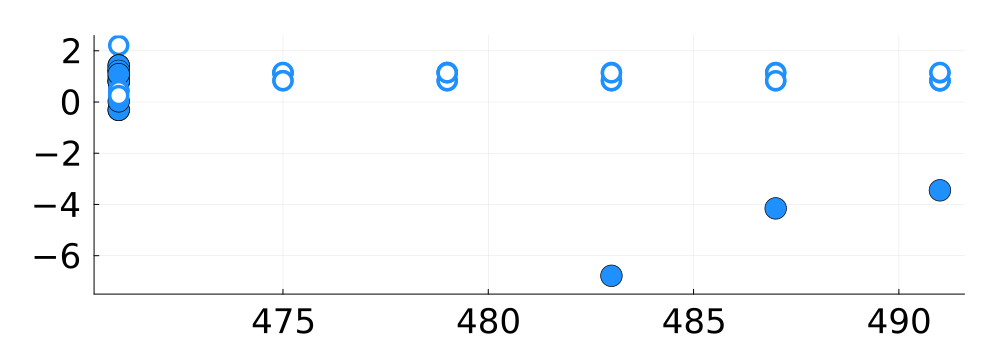

In [13]:

 bif_diag = Plots.plot(size=(1000,350),xtickfont=font(23), legend = false ,
 ytickfont=font(23),xguidefontsize=28,yguidefontsize=28,legendfont=font(22),linewidth=3,margin=7Plots.mm)
 
 #40-760
 experiment_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/dynamical_objects_4710_4910_order_1 copy.jld2"
 
 data_coarse=load(experiment_path)
 # plot all points after mapping them on PC1
 x_coarse=471:4:491
 x_fine=280:5:400
 #println(data_coarse)
 
 points = Vector[]
 for i in eachindex(data_coarse["dynamical_objects"])
     for j in eachindex(data_coarse["dynamical_objects"][i][1])
         try
             for k = 1:length(data_coarse["dynamical_objects"][i][1][j])
                 if all(abs.(data_coarse["dynamical_objects"][i][2][j][k]) .< 1)
                 #println(float(x_coarse[i]), predict(M,data_coarse["dynamical_objects"][i][1][j][1][k])[1])
                     #for n =1:j
                    scatter!([float(x_coarse[i])], predict(M,data_coarse["dynamical_objects"][i][1][j][k][1]),m=12,color="dodgerblue",markershape=:circle)
                    # end
                     #println(data_coarse["dynamical_objects"][i][1][j][1][k])
                 else
                     #for n =1:j
                    scatter!([float(x_coarse[i])], predict(M,data_coarse["dynamical_objects"][i][1][j][k][1]),color="red",m = (10, :white, stroke(5, "dodgerblue")))
                     #println(data_coarse["dynamical_objects"][i][1][j][1][k])
                    # end
                 end
             end
 
         catch
             continue
         end
         
     end
 end
 
 
 
 # cycle 
 
 
 #40-760
 experiment_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/dynamical_objects_4710_order_37.jld2"
 
 data_coarse=load(experiment_path)
 # plot all points after mapping them on PC1
 x_coarse=471:40:491
 #println(data_coarse)
 foreground=nothing
 points = Vector[]
 for i in eachindex(data_coarse["dynamical_objects"])
     for j in eachindex(data_coarse["dynamical_objects"][i][1])
         try
             for k = 1:length(data_coarse["dynamical_objects"][i][1][j])
                 if all(abs.(data_coarse["dynamical_objects"][i][2][j][k]) .< 1)
                 #println(float(x_coarse[i]), predict(M,data_coarse["dynamical_objects"][i][1][j][1][k])[1])
                     for n =1:j
                         scatter!([float(x_coarse[i])], predict(M,data_coarse["dynamical_objects"][i][1][j][k][n]),m=12,color="dodgerblue",markershape=:circle)
                     end
                     #println(data_coarse["dynamical_objects"][i][1][j][1][k])
                 else
                     for n =1:j
                         scatter!([float(x_coarse[i])], predict(M,data_coarse["dynamical_objects"][i][1][j][k][n]),color="red",m = (10, :white, stroke(5, "dodgerblue")))
                     #println(data_coarse["dynamical_objects"][i][1][j][1][k])
                     end
                 end
             end
 
         catch
             continue
         end
         
     end
 end
 #scatter!([float(x_coarse[1])],foreground,m=12,color="dodgerblue",markershape=:circle)
 
 #xlabel!("Epoch")
 #ylabel!("PC1")

 
 ylims!(bif_diag,(-7.5,2.6))
 savefig(bif_diag,"bif_diag.png")
 display(bif_diag)
 
 
 

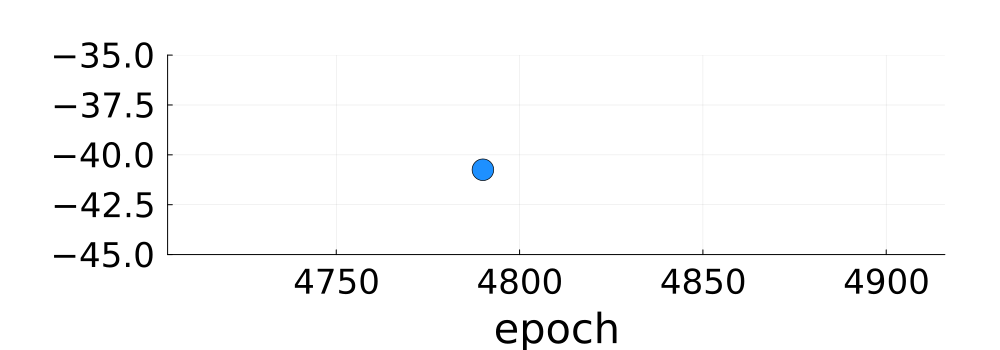

In [14]:
#pyplot()

bif_diag2 = Plots.plot(size=(1000,350),xtickfont=font(23), legend = false, 
ytickfont=font(23),xguidefontsize=28,yguidefontsize=28,legendfont=font(22),linewidth=3,margin=12Plots.mm)

#40-760
experiment_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/dynamical_objects_4710_4910_order_1 copy.jld2"
 
data_coarse=load(experiment_path)
# plot all points after mapping them on PC1
x_coarse=471:4:491
x_fine=280:5:400
#println(data_coarse)

points = Vector[]
for i in eachindex(data_coarse["dynamical_objects"])
    for j in eachindex(data_coarse["dynamical_objects"][i][1])
        try
            for k = 1:length(data_coarse["dynamical_objects"][i][1][j])
                if all(abs.(data_coarse["dynamical_objects"][i][2][j][k]) .< 1)
                #println(float(x_coarse[i]), predict(M,data_coarse["dynamical_objects"][i][1][j][1][k])[1])
                    scatter!([float(x_coarse[i])*10], predict(M,data_coarse["dynamical_objects"][i][1][j][k][1]),m=12,color="dodgerblue",markershape=:circle)
                    
                else
                    scatter!([float(x_coarse[i])*10], predict(M,data_coarse["dynamical_objects"][i][1][j][k][1]),color="red",m = (10, :white, stroke(5, "dodgerblue")))
                    
                end
            end

        catch
            continue
        end
        
    end
end



# cycle 

#40-76
experiment_path = "example cell/reg4_mae_example_cell_shallow-BPE-10-60000epochs_seq200/run9-alpha_0.07-H_20-reg_1.0e-5-epochs_60000-dim_6-batchsize_16/001/checkpoints/dynamical_objects_4710_order_37.jld2"
data_coarse=load(experiment_path)
# plot all points after mapping them on PC1
x_coarse=471:40:491
#println(data_coarse)

points = Vector[]
for i in eachindex(data_coarse["dynamical_objects"])
    for j in eachindex(data_coarse["dynamical_objects"][i][1])
        try
            for k = 1:length(data_coarse["dynamical_objects"][i][1][j])
                if all(abs.(data_coarse["dynamical_objects"][i][2][j][k]) .< 1)
                #println(float(x_coarse[i]), predict(M,data_coarse["dynamical_objects"][i][1][j][1][k])[1])
                    scatter!([float(x_coarse[i])*10], predict(M,data_coarse["dynamical_objects"][i][1][j][k][1]),m=12,color="dodgerblue",markershape=:circle)
                    
                else
                    scatter!([float(x_coarse[i])*10], predict(M,data_coarse["dynamical_objects"][i][1][j][k][1]),color="red",m = (10, :white, stroke(5, "dodgerblue")))
                    
                end
            end

        catch
            continue
        end
        
    end
end

xlabel!("epoch")
#ylabel!("PC1")


ylims!(bif_diag2,(-45,-35))
savefig(bif_diag2,"bif_diag2.png")
display(bif_diag2)




# cut axis